In [144]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from math import *
import numpy as np
import scipy.stats as st
import pylab 
import matplotlib.pyplot as plt
# Deux fonctions (au moins) permettent de faire de l'estimation à noyau sous Python
# La première KDEUnivarite
from statsmodels.nonparametric.kde import KDEUnivariate 
from statsmodels.nonparametric.kernel_regression import KernelReg # NW et Polynome locaux p=0
import statsmodels.nonparametric.bandwidths
import statsmodels.api as sm
# La seconde KernelDensity
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
#from sklearn_extensions.kernel_regression import KernelRegression
import matplotlib.pyplot as plt
import scipy as sp

In [85]:

data1 = pd.read_csv("Data1.csv")
data2 = pd.read_csv("Data2.csv")


In [192]:

n = 5000
grid = np.linspace(1,6,5000)
grid
X = data1['X']
Y = data1['Y1']
true_f = X
h1 = statsmodels.nonparametric.bandwidths.bw_scott(X)
h2 = statsmodels.nonparametric.bandwidths.bw_silverman(X)

(1.06*np.sqrt(np.var(X))*n**(-1/5), h1, h2)

array([1.       , 1.0010002, 1.0020004, ..., 5.9979996, 5.9989998,
       6.       ])

(0.3549569762478264, 0.3546575787072304, 0.30140870711662643)

In [204]:

bandwidths = 10 ** np.linspace(-2, 1, 100)
GG = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv= 2)
#X.reshape(-1,1)
GG.fit(X.to_numpy().reshape(-1,1))
h_cv2 = GG.best_params_["bandwidth"]
h_cv2

GridSearchCV(cv=2, estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.01      ,  0.01072267,  0.01149757,  0.01232847,  0.01321941,
        0.01417474,  0.01519911,  0.01629751,  0.01747528,  0.01873817,
        0.02009233,  0.02154435,  0.0231013 ,  0.02477076,  0.02656088,
        0.02848036,  0.03053856,  0.03274549,  0.03511192,  0.03764936,
        0.04037017,  0.04328761,  0.04641589,  0.04977024,  0.05336699,
        0.05722...
        0.93260335,  1.        ,  1.07226722,  1.149757  ,  1.23284674,
        1.32194115,  1.41747416,  1.51991108,  1.62975083,  1.7475284 ,
        1.87381742,  2.009233  ,  2.15443469,  2.3101297 ,  2.47707636,
        2.65608778,  2.84803587,  3.05385551,  3.27454916,  3.51119173,
        3.76493581,  4.03701726,  4.32876128,  4.64158883,  4.97702356,
        5.33669923,  5.72236766,  6.13590727,  6.57933225,  7.05480231,
        7.56463328,  8.11130831,  8.69749003,  9.32603347, 10.        ])})

0.01

Text(0.5, 0, 'X')

Text(0, 0.5, 'fonction densité')

Text(0.5, 1.0, 'Représentation de la densité')

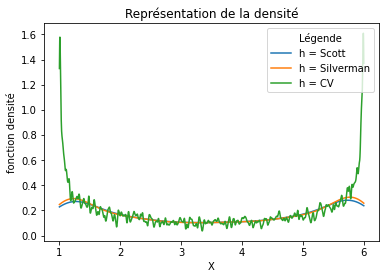

In [134]:
# Utilisation en densité
def f_hat(grid , X, h, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels""" 
    # grid: grille de points où l'estimateur de $f$ sera évalué
    # X: échantillon (X_1,..., X_n)
    # h: choix de la taille de la fenêtre
    # **kwargs: arguments optionels Par défaut le noyau gaussien est utilisé
    kde = KDEUnivariate(X)
    kde.fit(bw = h, **kwargs)
    return kde.evaluate(grid)

g1, = plt.plot(grid, f_hat(grid, X, h1))
g2, = plt.plot(grid, f_hat(grid, X, h2))
#g3, = plt.plot(grid, f_hat(grid, X, h_cv))
#g4, = plt.plot(grid, f_hat(grid, X, h_cv1))
g5, = plt.plot(grid, f_hat(grid, X, h_cv2))
#g5, = plt.plot(grid, true_f)

plt.legend([g1, g2, g5], ['h = Scott', 'h = Silverman','h = CV'],
              loc = 'upper right' , title = 'Légende')
plt.xlabel('X')
plt.ylabel('fonction densité')
plt.title('Représentation de la densité')


(array([0.225 , 0.0892, 0.0742, 0.0532, 0.05  , 0.053 , 0.0562, 0.0738,
        0.0928, 0.2326]),
 array([1.        , 1.49999999, 1.99999997, 2.49999996, 2.99999994,
        3.49999993, 3.99999991, 4.4999999 , 4.99999988, 5.49999986,
        5.99999985]),
 <BarContainer object of 10 artists>)

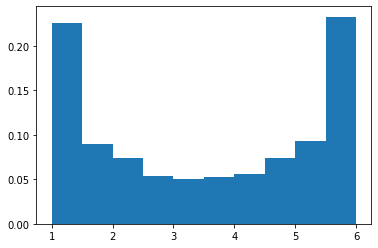

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(true_f, weights=np.zeros_like(true_f) + 1. / true_f.size)

((array([1.38619827e-04, 3.36475437e-04, 5.36460838e-04, ...,
         9.99463539e-01, 9.99663525e-01, 9.99861380e-01]),
  array([1.        , 1.00000241, 1.00000245, ..., 5.99999668, 5.99999799,
         5.99999985])),
 (6.288361029000745, 0.38330587012138917, 0.9868503047727722))

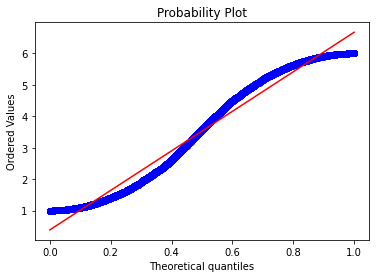

In [50]:
st.probplot(X, dist="uniform", plot=pylab)
pylab.show()

In [101]:
# estimateur de Naradaha Watson
Kreg = KernelReg(Y, X, var_type = 'c' , reg_type = 'lc', bw = 'cv_ls')
h_cv = Kreg.bw

In [102]:
#estimateur poly locaux 
Kreg1 = KernelReg(Y, X, var_type = 'c' , reg_type = 'll', bw = 'cv_ls')
h_cv1 = Kreg1.bw

In [203]:
# Utilisation en densité
def f_hat(grid , X, h, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels""" 
    # grid: grille de points où l'estimateur de $f$ sera évalué
    # X: échantillon (X_1,..., X_n)
    # h: choix de la taille de la fenêtre
    # **kwargs: arguments optionels Par défaut le noyau gaussien est utilisé
    kde = KDEUnivariate(X)
    kde.fit(bw = h, **kwargs)
    return kde.evaluate(grid)

r_hcv = f_hat(grid, X, h_cv)
r_hcv1 = f_hat(grid, X, h_cv1)

<ipython-input-143-83549c17fa47>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


(array([0.225 , 0.0892, 0.0742, 0.0532, 0.05  , 0.053 , 0.0562, 0.0738,
        0.0928, 0.2326]),
 array([1.        , 1.49999999, 1.99999997, 2.49999996, 2.99999994,
        3.49999993, 3.99999991, 4.4999999 , 4.99999988, 5.49999986,
        5.99999985]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'X')

Text(0, 0.5, 'fonction de régressioń')

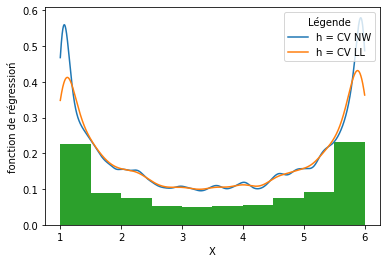

In [143]:
              
fig = plt.figure()
#g, =  plt.plot(X, 'c.')
g3, = plt.plot(grid, r_hcv)
g4, = plt.plot(grid, r_hcv1)

plt.legend([g3, g4], ['h = CV NW', 'h = CV LL'],loc = 'upper right' , title = 'Légende')

ax = fig.add_subplot(111)
ax.hist(true_f, weights=np.zeros_like(true_f) + 1. / true_f.size)
plt.xlabel('X')
plt.ylabel('fonction de régressioń')

In [150]:

prueba0 = sp.stats.chisquare(np.zeros_like(true_f) + 1. / true_f.size,r_hcv)
prueba0
prueba1 = sp.stats.chisquare(np.zeros_like(true_f) + 1. / true_f.size,r_hcv1)
prueba1

array([0.46779944, 0.47049677, 0.47316158, ..., 0.49261378, 0.48989186,
       0.48713533])

Power_divergenceResult(statistic=921.4746847402405, pvalue=1.0)

Power_divergenceResult(statistic=894.6828501920148, pvalue=1.0)

(array([2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.300e+01, 1.207e+03, 1.075e+03, 1.610e+02, 2.700e+01, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-5.10973003, -4.34585406, -3.58197809, -2.81810212, -2.05422615,
        -1.29035018, -0.52647421,  0.23740176,  1.00127773,  1.76515369,
         2.52902966,  3.29290563,  4.0567816 ,  4.82065757,  5.58453354,
         6.34840951,  7.11228548,  7.87616145,  8.64003742,  9.40391339,
        10.16778936]),
 <BarContainer object of 20 artists>)

count    2500.000000
mean        1.062206
std         0.627495
min        -5.109730
25%         0.661562
50%         1.009256
75%         1.379574
max        10.167789
Name: Y1, dtype: float64

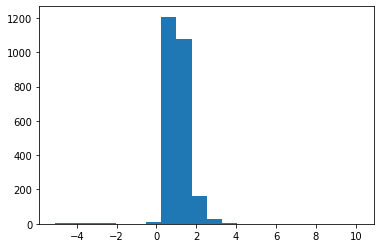

In [172]:
#r_hcv1L = r_hcv1[2499:4999]
#Y_L = Y[2499:4999]
r_hcv1L = r_hcv1[0:2500]
Y_L = Y[0:2500]
#plt.plot(Y_L,r_hcv1L)
epsilonL = Y_L-r_hcv1L
plt.hist(epsilonL,bins=20)
pd.Series(epsilonL).describe()

In [180]:
h1eps = statsmodels.nonparametric.bandwidths.bw_scott(epsilonL)
h2eps = statsmodels.nonparametric.bandwidths.bw_silverman(epsilonL)

(1.06*np.sqrt(np.var(epsilonL))*n**(-1/5), h1eps, h2eps)

(0.1210696901642669, 0.11787654025038381, 0.10017836281902308)

In [182]:
bandwidths = 10 ** np.linspace(-2, 1, 100)
GG = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv= 2)
GG.fit(epsilonL.to_numpy().reshape(-1,1))
h_cv2eps = GG.best_params_["bandwidth"]
h_cv2eps

GridSearchCV(cv=2, estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.01      ,  0.01072267,  0.01149757,  0.01232847,  0.01321941,
        0.01417474,  0.01519911,  0.01629751,  0.01747528,  0.01873817,
        0.02009233,  0.02154435,  0.0231013 ,  0.02477076,  0.02656088,
        0.02848036,  0.03053856,  0.03274549,  0.03511192,  0.03764936,
        0.04037017,  0.04328761,  0.04641589,  0.04977024,  0.05336699,
        0.05722...
        0.93260335,  1.        ,  1.07226722,  1.149757  ,  1.23284674,
        1.32194115,  1.41747416,  1.51991108,  1.62975083,  1.7475284 ,
        1.87381742,  2.009233  ,  2.15443469,  2.3101297 ,  2.47707636,
        2.65608778,  2.84803587,  3.05385551,  3.27454916,  3.51119173,
        3.76493581,  4.03701726,  4.32876128,  4.64158883,  4.97702356,
        5.33669923,  5.72236766,  6.13590727,  6.57933225,  7.05480231,
        7.56463328,  8.11130831,  8.69749003,  9.32603347, 10.        ])})

0.30538555088334157

Text(0.5, 0, 'X')

Text(0, 0.5, 'fonction densité')

Text(0.5, 1.0, 'Représentation de la densité')

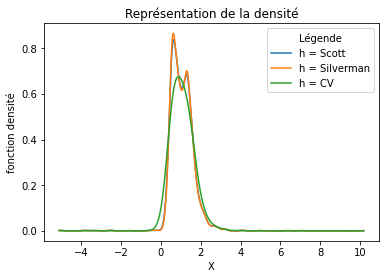

In [188]:
grid0 = np.linspace(-5.09,10.17,2500)
g1, = plt.plot(grid0, f_hat(grid0, epsilonL, h1eps))
g2, = plt.plot(grid0, f_hat(grid0, epsilonL, h2eps))
#g3, = plt.plot(grid, f_hat(grid, X, h_cv))
#g4, = plt.plot(grid, f_hat(grid, X, h_cv1))
g5, = plt.plot(grid0, f_hat(grid0, epsilonL, h_cv2eps))
#g5, = plt.plot(grid, true_f)

plt.legend([g1, g2, g5], ['h = Scott', 'h = Silverman','h = CV'],
              loc = 'upper right' , title = 'Légende')
plt.xlabel('X')
plt.ylabel('fonction densité')
plt.title('Représentation de la densité')


(array([2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.300e+01, 1.207e+03, 1.075e+03, 1.610e+02, 2.700e+01, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-5.10973003, -4.34585406, -3.58197809, -2.81810212, -2.05422615,
        -1.29035018, -0.52647421,  0.23740176,  1.00127773,  1.76515369,
         2.52902966,  3.29290563,  4.0567816 ,  4.82065757,  5.58453354,
         6.34840951,  7.11228548,  7.87616145,  8.64003742,  9.40391339,
        10.16778936]),
 <BarContainer object of 20 artists>)

count    2500.000000
mean        1.062206
std         0.627495
min        -5.109730
25%         0.661562
50%         1.009256
75%         1.379574
max        10.167789
Name: Y1, dtype: float64

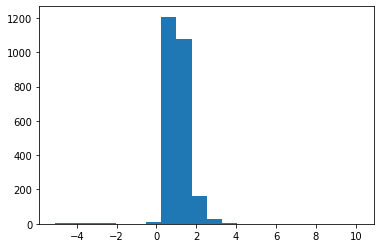

In [189]:
plt.hist(epsilonL,bins=20)
pd.Series(epsilonL).describe()

((array([-3.45297476, -3.20602916, -3.06928934, ...,  3.06928934,
          3.20602916,  3.45297476]),
  array([-5.10973003, -4.95999558, -3.96625989, ...,  6.32963812,
          7.0207768 , 10.16778936])),
 (0.5569168446880703, 1.062206098257546, 0.8866021540211507))

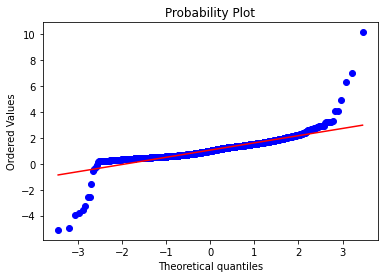

In [196]:
st.probplot(epsilonL, dist="norm", plot=pylab)
pylab.show()

In [198]:
#test de normalité
prueba_norm_eps = sp.stats.shapiro(epsilonL)
prueba_norm_eps

(0.7898110151290894, 0.0)

In [200]:
#regression avec poly locaux 
Kreg3 = KernelReg(epsilonL**2, X[0:2500], var_type = 'c' , reg_type = 'll', bw = 'cv_ls')
h_cv3 = Kreg3.bw

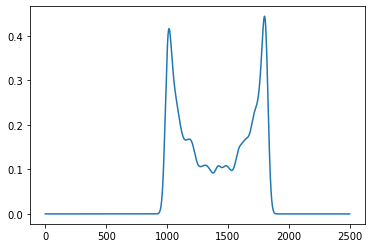

In [202]:
r_hcv3 = f_hat(grid0, X[0:2500], h_cv3)
plt.plot(r_hcv3)# Ouais!!!